<a href="https://colab.research.google.com/github/sac-1999/Deep-Learning_Convolutional-Neural-Network/blob/main/Basic_Alexnet_Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The highlights of this paper:
* Breakthrough in Deep Learning using CNN for image classification.
* Multi-GPUs
* Use ReLU
* Use Dropout

Note
* Prior to alexnet people used to implement feature engineering and SVM classifier but this paper boosted CNN models.

# Architecture

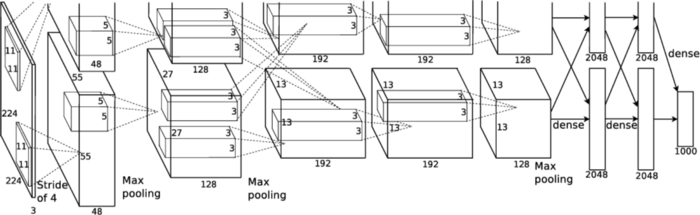

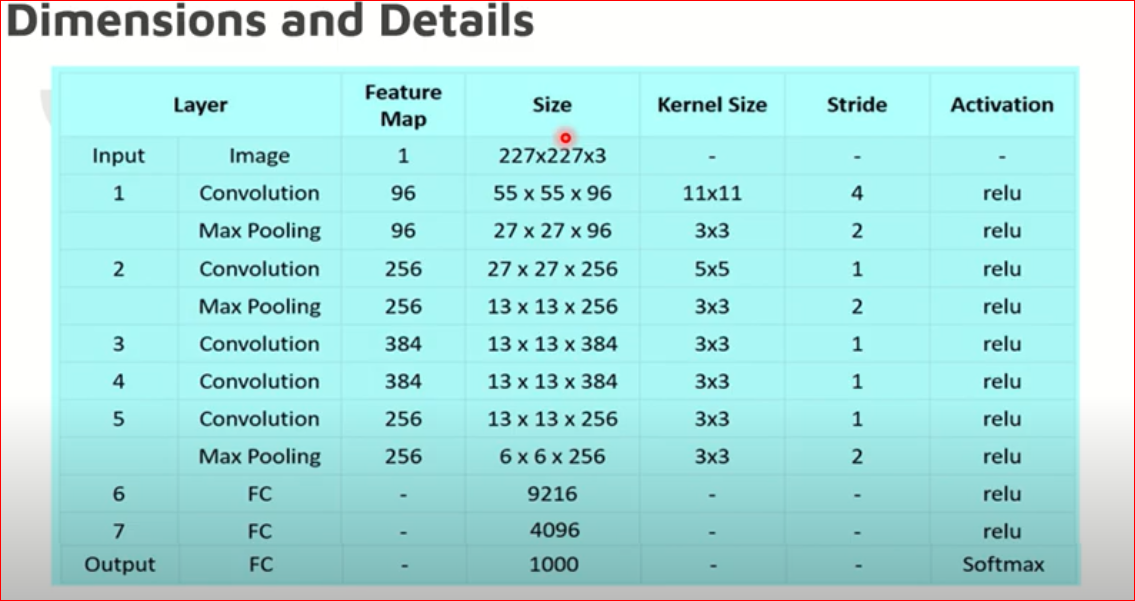

# Insights of Alexnet

### 1. **Relu Non linearitiy**

* Since relu is a Non saturating function while sinh and tanh both are saturating Nonlinearities .
* Saturating function means after some time when input becomes very large or very small then there is no significant change in the value of the function and we can clearly see derivative of tanh and sigmoid function at farthest point from origin is almost 0.

#### **Benefits of Using Relu**
* Avoid vanishing gradients for positive values.
* More computationally efficient to compute than sigmoid and tanh.
* Better convergence performance than sigmoid and tanh.

### 2. **Dataset**
* ImageNet consists of variable-resolution images, while our system requires a constant input dimensionality. Therefore, we down-sampled the images to a fixed resolution of 256 × 256. Given a
rectangular image, we first rescaled the image such that the shorter side was of length 256, and then
cropped out the central 256×256 patch from the resulting image. 

** Note ** We generally observe during training that models with overlapping
pooling find it slightly more difficult to overfit.

### 3. **Drop-out**
* 


### 4. **Details of learning**
* We trained our models using stochastic gradient descent
with a batch size of 128 examples, momentum of 0.9, and
weight decay of 0.0005. We found that this small amount
of weight decay was important for the model to learn


### **Imports**

In [1]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tensorflow as tf
from tensorflow.keras import datasets
import tensorflow as tf
from tensorflow. keras. layers import Dense, Conv2D, MaxPooling2D,Flatten, Activation
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
import keras

### **Loading Cifar-10 data by tensorflow datasets library**

In [2]:
src = datasets.cifar10.load_data()
train_x = src[0][0]
train_y = src[0][1]
test_x = src[1][0]
test_y = src[1][1]

170500096/170498071 [==============================] - 2s 0us/step


### **Reducing size of data due to colab limitation**

In [3]:
train_x = train_x[:5000]
train_y = train_y[:5000]
test_x = test_x[:1000]
test_y = test_y[:1000]

In [4]:
class_label = {
0 : 'airplane', 
1 : 'automobile',
2 : 'bird',
3 : 'cat',
4 : 'deer',
5 : 'dog',
6 : 'frog',
7 : 'horse',
8 : 'ship',
9 : 'truck'}

### **Plotting top 20 Images with x - label**

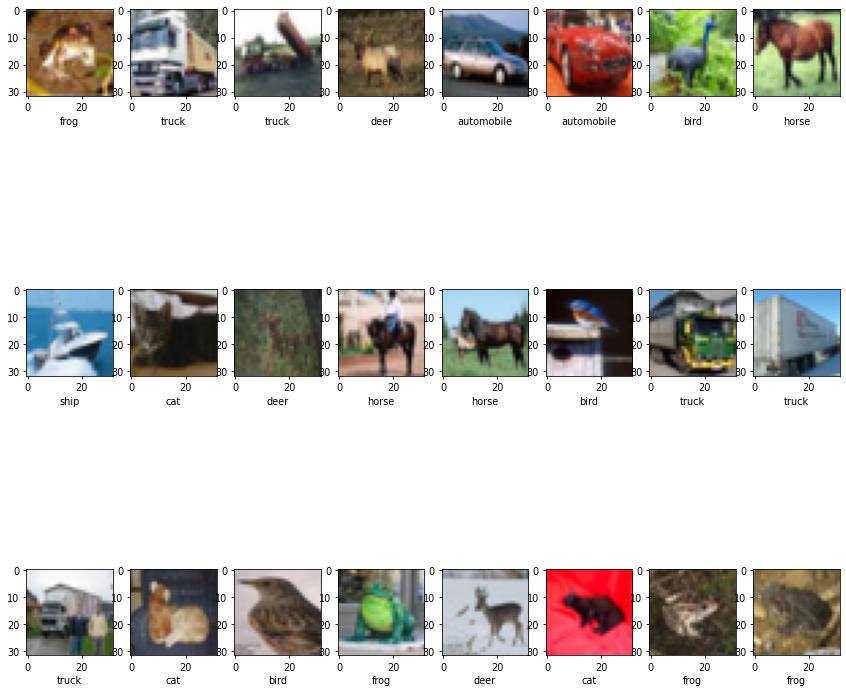

In [5]:
def show_image():
  fig = plt.figure(figsize= (15,15), dpi = 70)
  for i in range(24):
    ax = fig.add_subplot(3,8,i+1)
    ax.imshow(train_x[i])
    ax.set_xlabel(class_label[int(train_y[i])])

show_image()

### **Checking the diff class_label train_y**

In [6]:
ones= pd.DataFrame(np.ones(train_y.shape),columns = ['ones'])
pd.concat([pd.DataFrame(train_y, columns = ['label']), ones], axis =1 ).groupby('label').count()
# around 500 per class images are present

,ones
label,
0,505
1,460
2,519
3,486
4,519
5,488
6,519
7,486
8,520


In [7]:
no_of_classes = 10
batch_size = 128
train_y = tf.keras.utils.to_categorical(train_y, no_of_classes)
test_y = tf.keras.utils.to_categorical(test_y, no_of_classes)

In [8]:
train_x.shape[1:]

(32, 32, 3)

In [13]:
input_shape = train_x.shape[1:]
model = tf.keras.Sequential()


# Layer1 -------------
model.add(Conv2D(filters = 96, kernel_size = (5,5),strides = (2,2),padding = 'valid',input_shape = input_shape))
model.add(Activation ('relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides = (2,2),padding = 'valid'))



#Layer2 --------------
model.add(Conv2D(256, (5,5),strides = (1,1),padding ='same' ))
model.add(Activation ('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2),padding = 'same'))


#Layer3 --------------
model.add(Conv2D(384, (3,3),strides = (1,1),padding ='same'))
model.add(Activation ('relu'))



#Layer4 --------------
model.add(Conv2D(384, (3,3),strides = (1,1),padding ='same'))
model.add(Activation  ('relu'))


#Layer5
model.add(Conv2D(256, (3,3),strides = (1,1),padding ='same'))
model.add(Activation ('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2), padding = 'same'))


# Flattening layer to use dense network
model.add(Flatten())
model.add(Dense(4096, activation= 'relu'))
model.add(Dense(4096, activation= 'relu'))
model.add(Dense(1000, activation= 'relu'))
model.add(Dense(no_of_classes, activation= 'softmax'))


model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 14, 96)        7296      
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 96)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 256)         614656    
_________________________________________________________________
activation_6 (Activation)    (None, 6, 6, 256)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 384)        

### Plotting some samples



In [11]:
'''testing = final_train_data.next
fig = plt.figure(figsize= (20,20),dpi = 70)
for i in range(32):
  ax = fig.add_subplot(4,8,i+1)
  ax.imshow(testing[0][i])
  ax.set_xlabel(class_label[int(testing[1][i])])'''

'testing = final_train_data.next\nfig = plt.figure(figsize= (20,20),dpi = 70)\nfor i in range(32):\n  ax = fig.add_subplot(4,8,i+1)\n  ax.imshow(testing[0][i])\n  ax.set_xlabel(class_label[int(testing[1][i])])'

In [16]:
epochs = 100
model.fit(train_x,
          train_y,
          epochs=epochs,
          validation_data=(test_x,test_y),
          verbose=2)

Epoch 1/100
157/157 - 115s - loss: 1.0876 - accuracy: 0.6036 - val_loss: 1.7434 - val_accuracy: 0.4260
Epoch 2/100
157/157 - 115s - loss: 0.9779 - accuracy: 0.6442 - val_loss: 2.2710 - val_accuracy: 0.4210
Epoch 3/100
157/157 - 115s - loss: 0.8886 - accuracy: 0.6864 - val_loss: 1.8625 - val_accuracy: 0.4240
Epoch 4/100
157/157 - 115s - loss: 0.8403 - accuracy: 0.7076 - val_loss: 2.0407 - val_accuracy: 0.4450
Epoch 5/100
157/157 - 115s - loss: 0.7754 - accuracy: 0.7280 - val_loss: 2.0566 - val_accuracy: 0.4470
Epoch 6/100
157/157 - 115s - loss: 0.6460 - accuracy: 0.7760 - val_loss: 2.2262 - val_accuracy: 0.4630
Epoch 7/100
157/157 - 115s - loss: 0.5988 - accuracy: 0.7950 - val_loss: 2.2654 - val_accuracy: 0.4500
Epoch 8/100
157/157 - 116s - loss: 0.6097 - accuracy: 0.8072 - val_loss: 2.0378 - val_accuracy: 0.4260
Epoch 9/100
157/157 - 115s - loss: 0.4982 - accuracy: 0.8356 - val_loss: 2.5231 - val_accuracy: 0.4730
Epoch 10/100
157/157 - 115s - loss: 0.4591 - accuracy: 0.8532 - val_loss:

### Image Data Generator best blog

https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/


### difference between kera.fit vs keras.fir_generator
https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/

In [18]:
pred = model.predict(test_x)

In [26]:
pred_class = np.argmax(pred, axis =1)

In [27]:
pred_class.shape

(1000,)

In [30]:
actual_class = np.argmax(test_y,axis = 1)

In [35]:
np.sum((actual_class == pred_class) )

479

In [ ]:
## we got 50 pcent accuracy only